# Dataset Overview: INX Future Inc. Employee Performance

## Dataset Summary
- Total Records: 1200 employees
- Total Features: 28 columns
- No missing values
- No duplicate records

## Column Descriptions

### Identification
- EmpNumber: Unique identifier for each employee (drop during modeling)

### Demographics
- Age: Age of the employee
- Gender: Male or Female
- MaritalStatus: Marital status of the employee (Single, Married, Divorced)
- EducationBackground: Field of education (e.g., Marketing, Life Sciences)

### Job Details
- EmpDepartment: Department the employee belongs to (e.g., Sales, R&D)
- EmpJobRole: Specific job role (e.g., Manager, Sales Executive)
- BusinessTravelFrequency: Frequency of business travel (e.g., Travel_Rarely)
- DistanceFromHome: Distance to office (numeric)
- EmpJobLevel: Job level (1 to 5 scale)

### Education and Training
- EmpEducationLevel: Education level (1 to 5)
- TrainingTimesLastYear: Number of training programs attended last year

### Job Performance Metrics
- EmpEnvironmentSatisfaction: Satisfaction with work environment (1 to 4)
- EmpJobInvolvement: Level of involvement in job tasks
- EmpJobSatisfaction: Overall job satisfaction
- EmpRelationshipSatisfaction: Satisfaction with work relationships
- EmpWorkLifeBalance: Balance between personal and professional life (1 to 4)
- OverTime: Whether the employee works overtime (Yes or No)
- Attrition: Whether the employee has left the organization (Yes or No)
- PerformanceRating: Final performance score (Target variable, range: 2 to 4)

### Career History
- NumCompaniesWorked: Number of companies the employee has worked in
- TotalWorkExperienceInYears: Total work experience in years
- ExperienceYearsAtThisCompany: Years at INX
- ExperienceYearsInCurrentRole: Years in current job role
- YearsSinceLastPromotion: Years since last promotion
- YearsWithCurrManager: Years with the current manager

### Compensation
- EmpHourlyRate: Hourly salary
- EmpLastSalaryHikePercent: Last salary hike in percent

## Target Variable
- PerformanceRating: Performance score of the employee (2 = Low, 3 = Average, 4 = High)

## Categorical Columns
- EmpNumber
- Gender
- EducationBackground
- MaritalStatus
- EmpDepartment
- EmpJobRole
- BusinessTravelFrequency
- OverTime
- Attrition

## Numerical Columns
- All remaining columns are numerical or ordinal

## Notes
- No missing data or null values
- No duplicate entries
- Suitable for classification modeling

***
# <center>`Exploratory data analysis`</center>
***
Exploratory Data Analysis is a vital process in the world of data science, serving as the initial step in the journey of data exploration. It involves the application of various statistical techniques and visualizations to better understand the underlying patterns, trends, and anomalies within a dataset. By employing EDA, analysts can uncover relationships between variables, identify outliers, and gain insights that might not be immediately apparent.

***
***
# Essential Installation and libraries initialization

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.utils.load_data import DataLoader
loader=DataLoader()
df=loader.load_dataset('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

2025-07-25 23:05:39,043 - load_data - INFO - Loading Data from file...
2025-07-25 23:05:39,235 - load_data - INFO - Excel Dataset Loaded Successfully!
2025-07-25 23:05:39,235 - load_data - INFO -  Dataset Shape: 1200 rows and 28 columns.


In [4]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [5]:
df.drop('EmpNumber',axis=1,inplace=True)

In [6]:
from src.utils.utils import basic_checks
basic_checks(df)

<bound method DataFrame.to_string of    Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0   32   Male           Marketing        Single            Sales   
1   47   Male           Marketing        Single            Sales   
2   40   Male       Life Sciences       Married            Sales   
3   41   Male     Human Resources      Divorced  Human Resources   
4   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  ...  \
0                  3                           4  ...   
1                  4                           4  ...  

### Conclusion: Descriptive analysis
- The dataset comprises 1200 employee records with 19 numerical features, including demographics (Age, DistanceFromHome), work experience (TotalWorkExperienceInYears, ExperienceYearsAtThisCompany), satisfaction levels (EmpJobSatisfaction, EmpWorkLifeBalance), and performance metrics (PerformanceRating), providing a comprehensive view of employee profiles.
- Some features show symmetric distributions, while others, like tenure-related metrics, are right-skewed with longer tails.Features like commuting distance exhibit high variability, whereas satisfaction and performance ratings are more consistent.
- Experience and promotion-related features are positively skewed, suggesting potential transformations for normalization.
- Varying scales and skewness highlight the need for standardization and transformation to prepare data for modeling.


## Univariate Analysis 

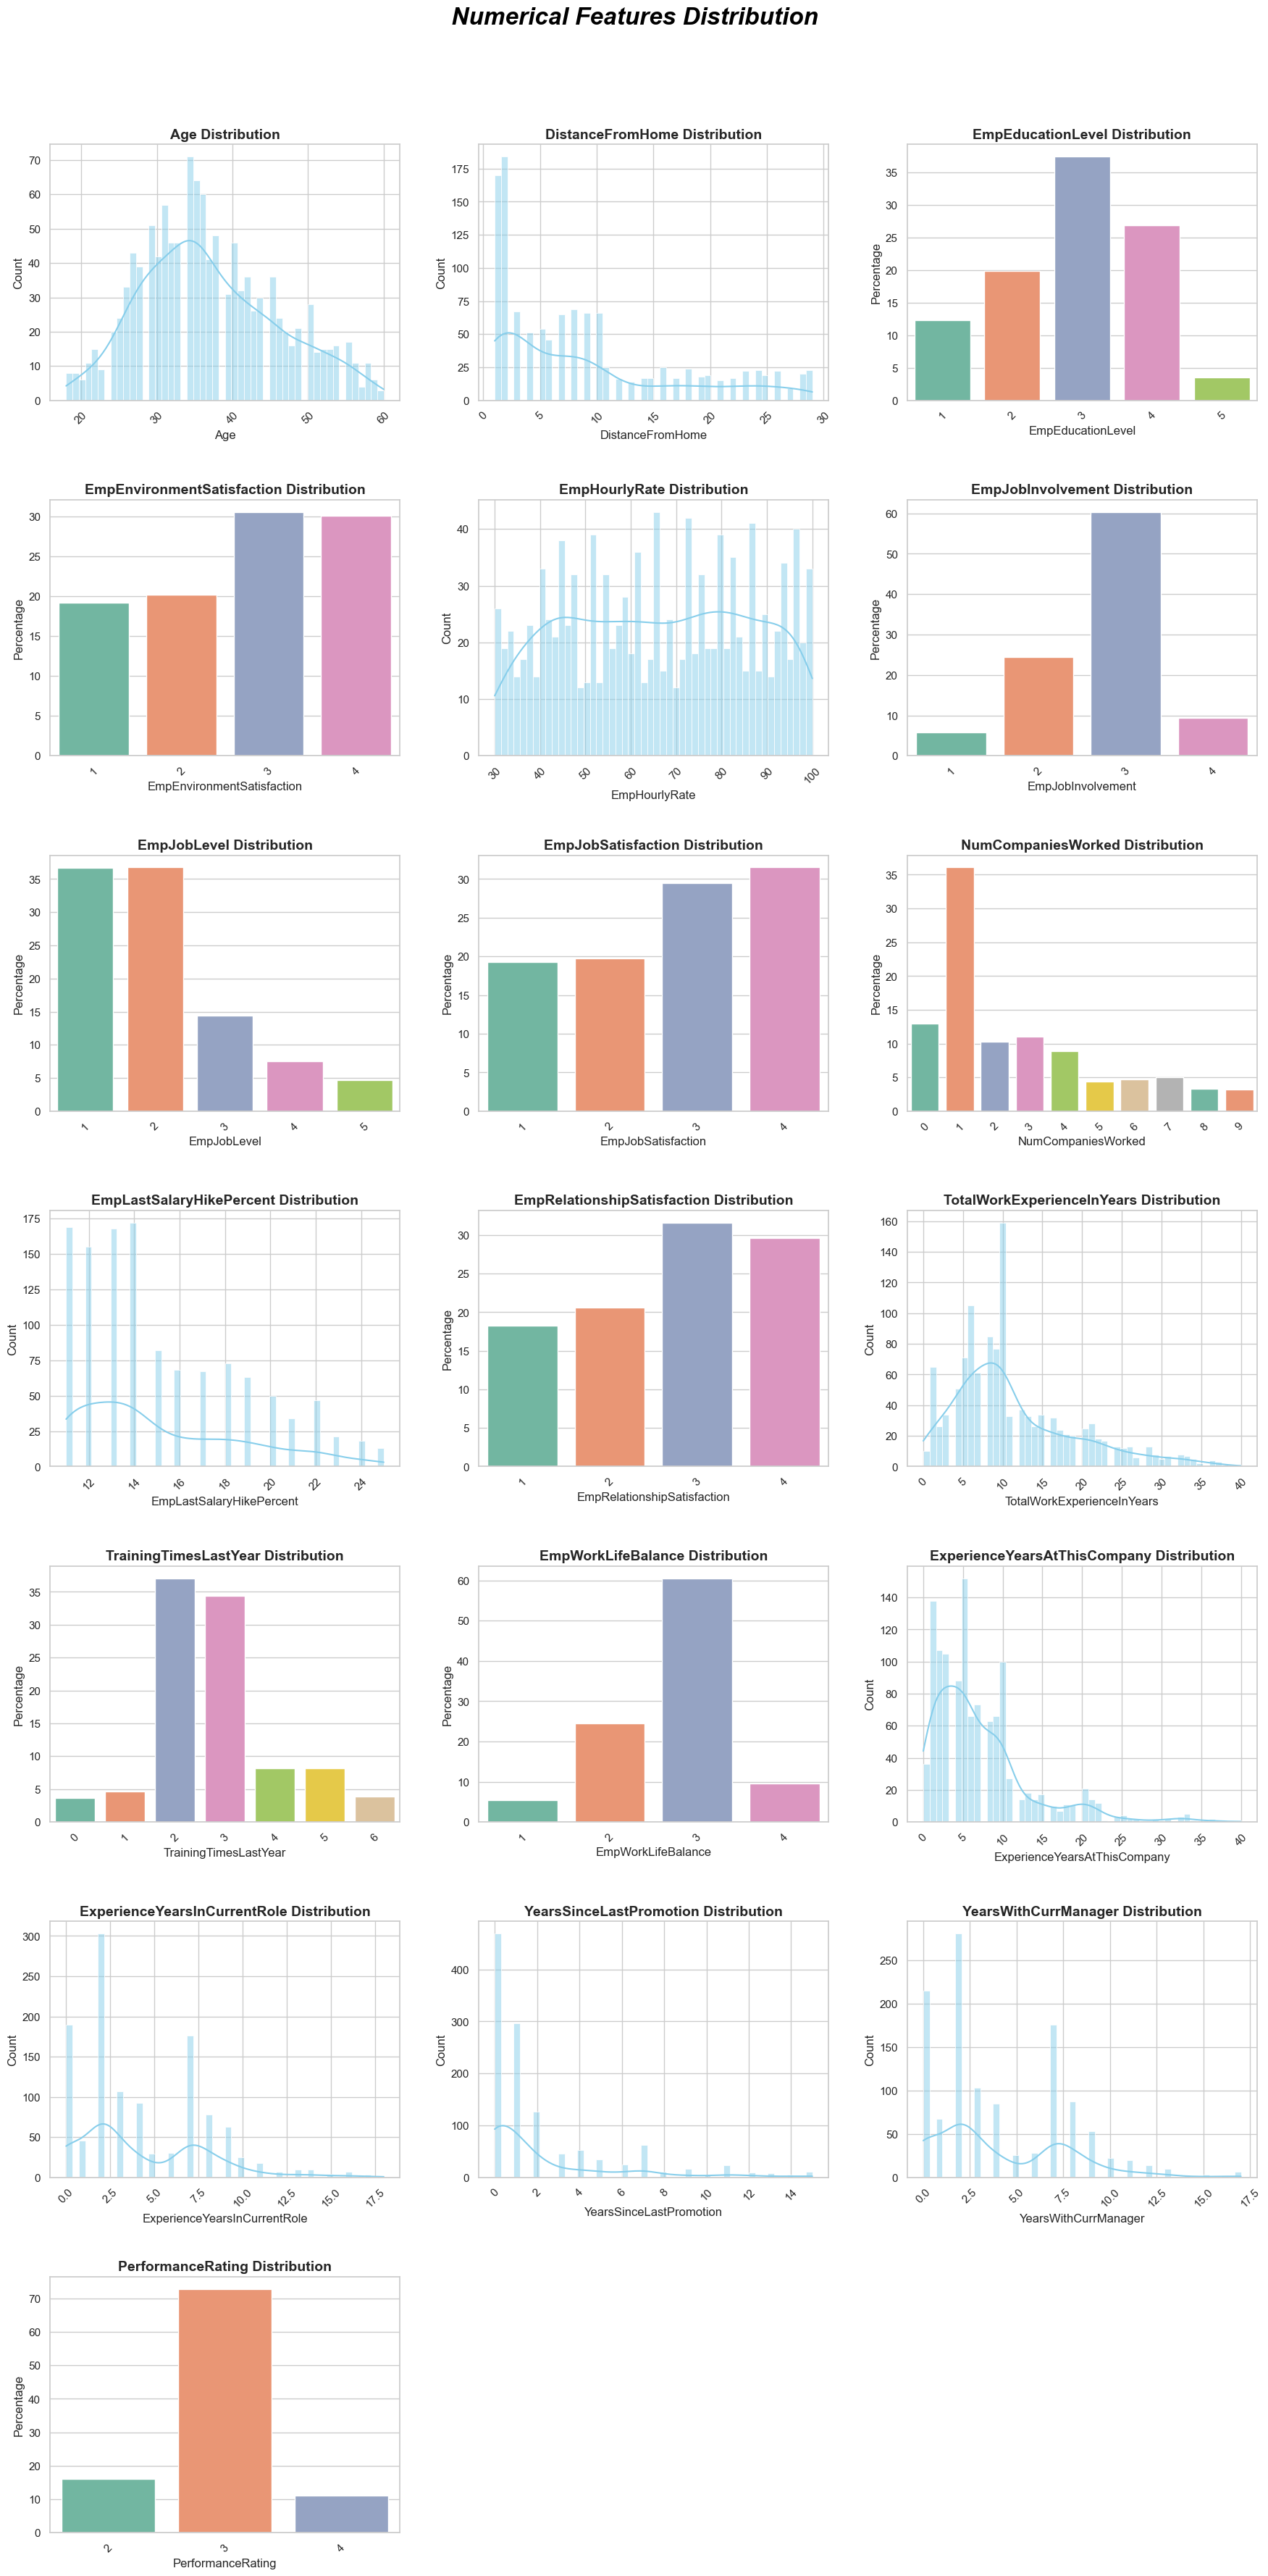

In [7]:
from src.visualization.univariate_analysis import numeric_univariate_analysis
numeric_univariate_analysis(df)

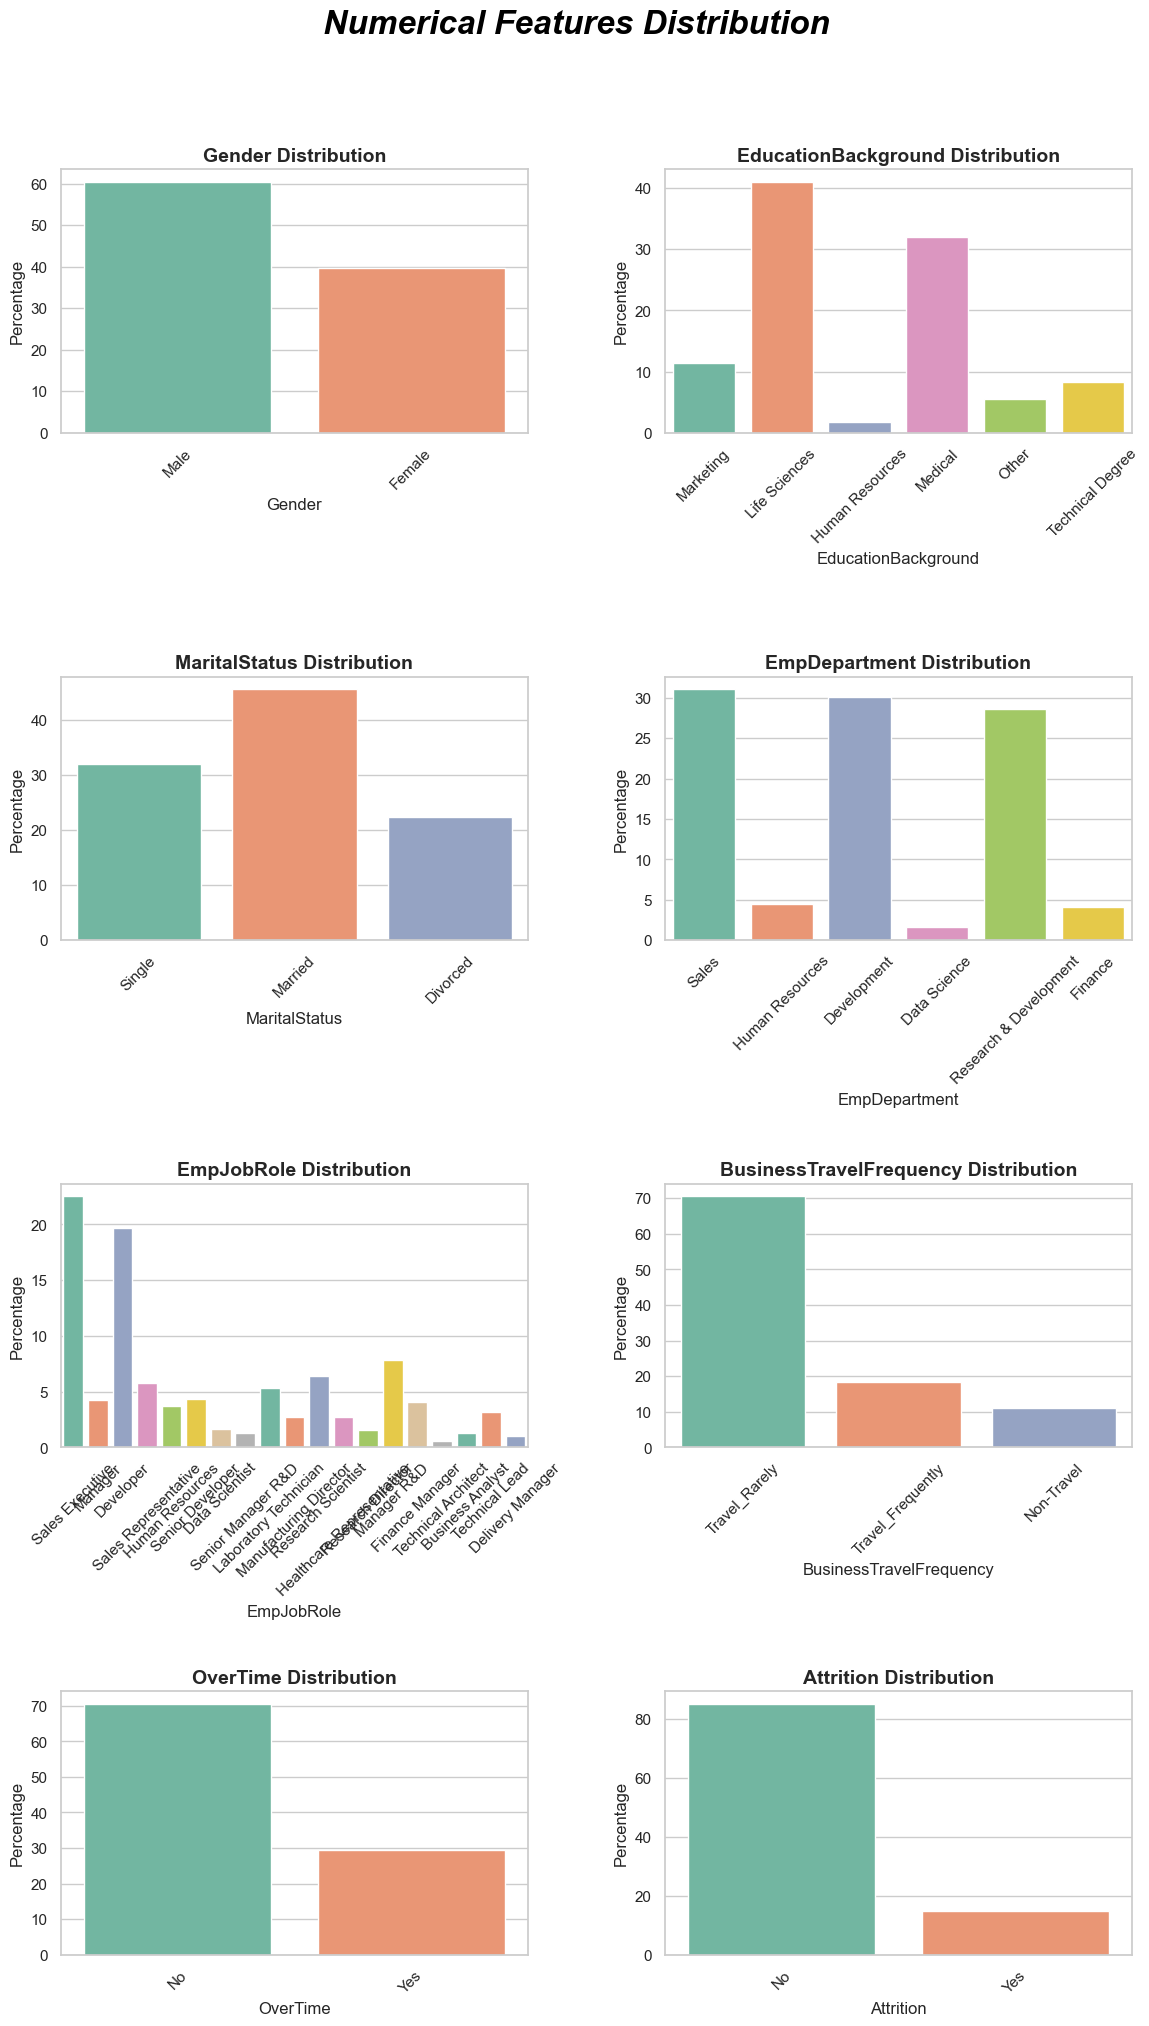

In [8]:
from src.visualization.univariate_analysis import categorical_univariate_analysis
categorical_univariate_analysis(df)

## BIvariate Analysis 

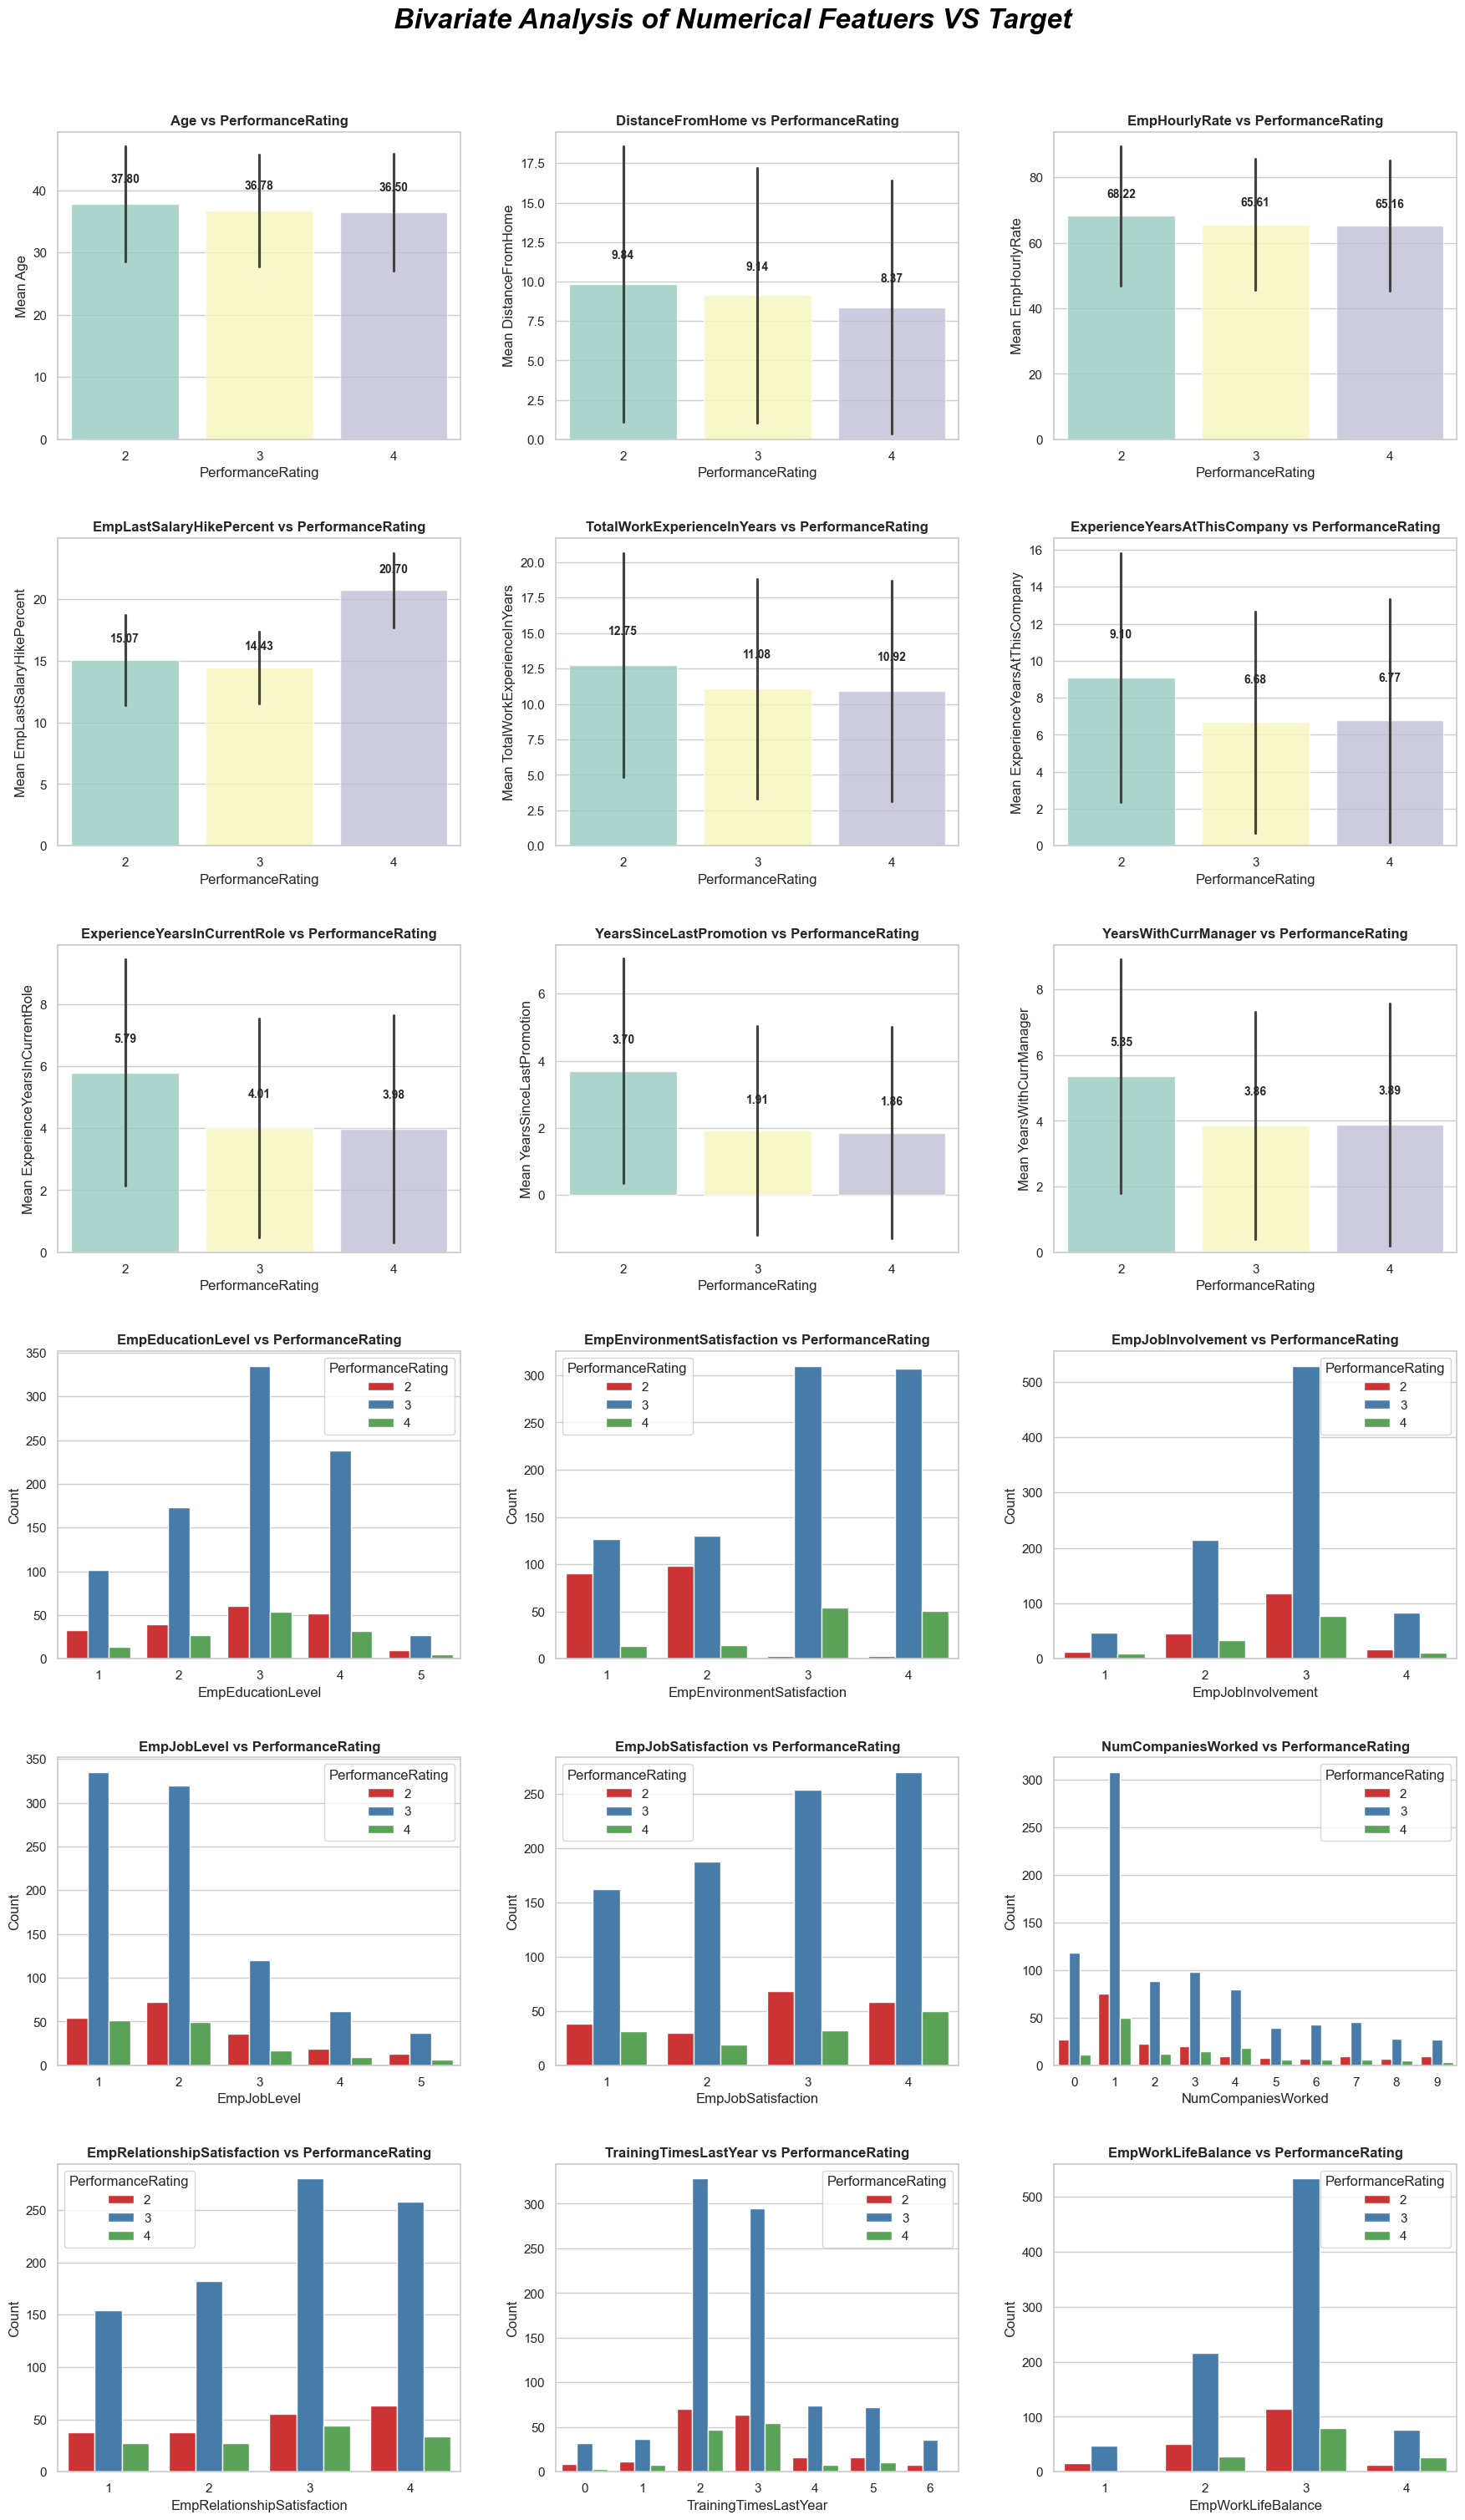

In [9]:
from src.visualization.bivarient_analysis import bivariate_numerical_plots
bivariate_numerical_plots(df)

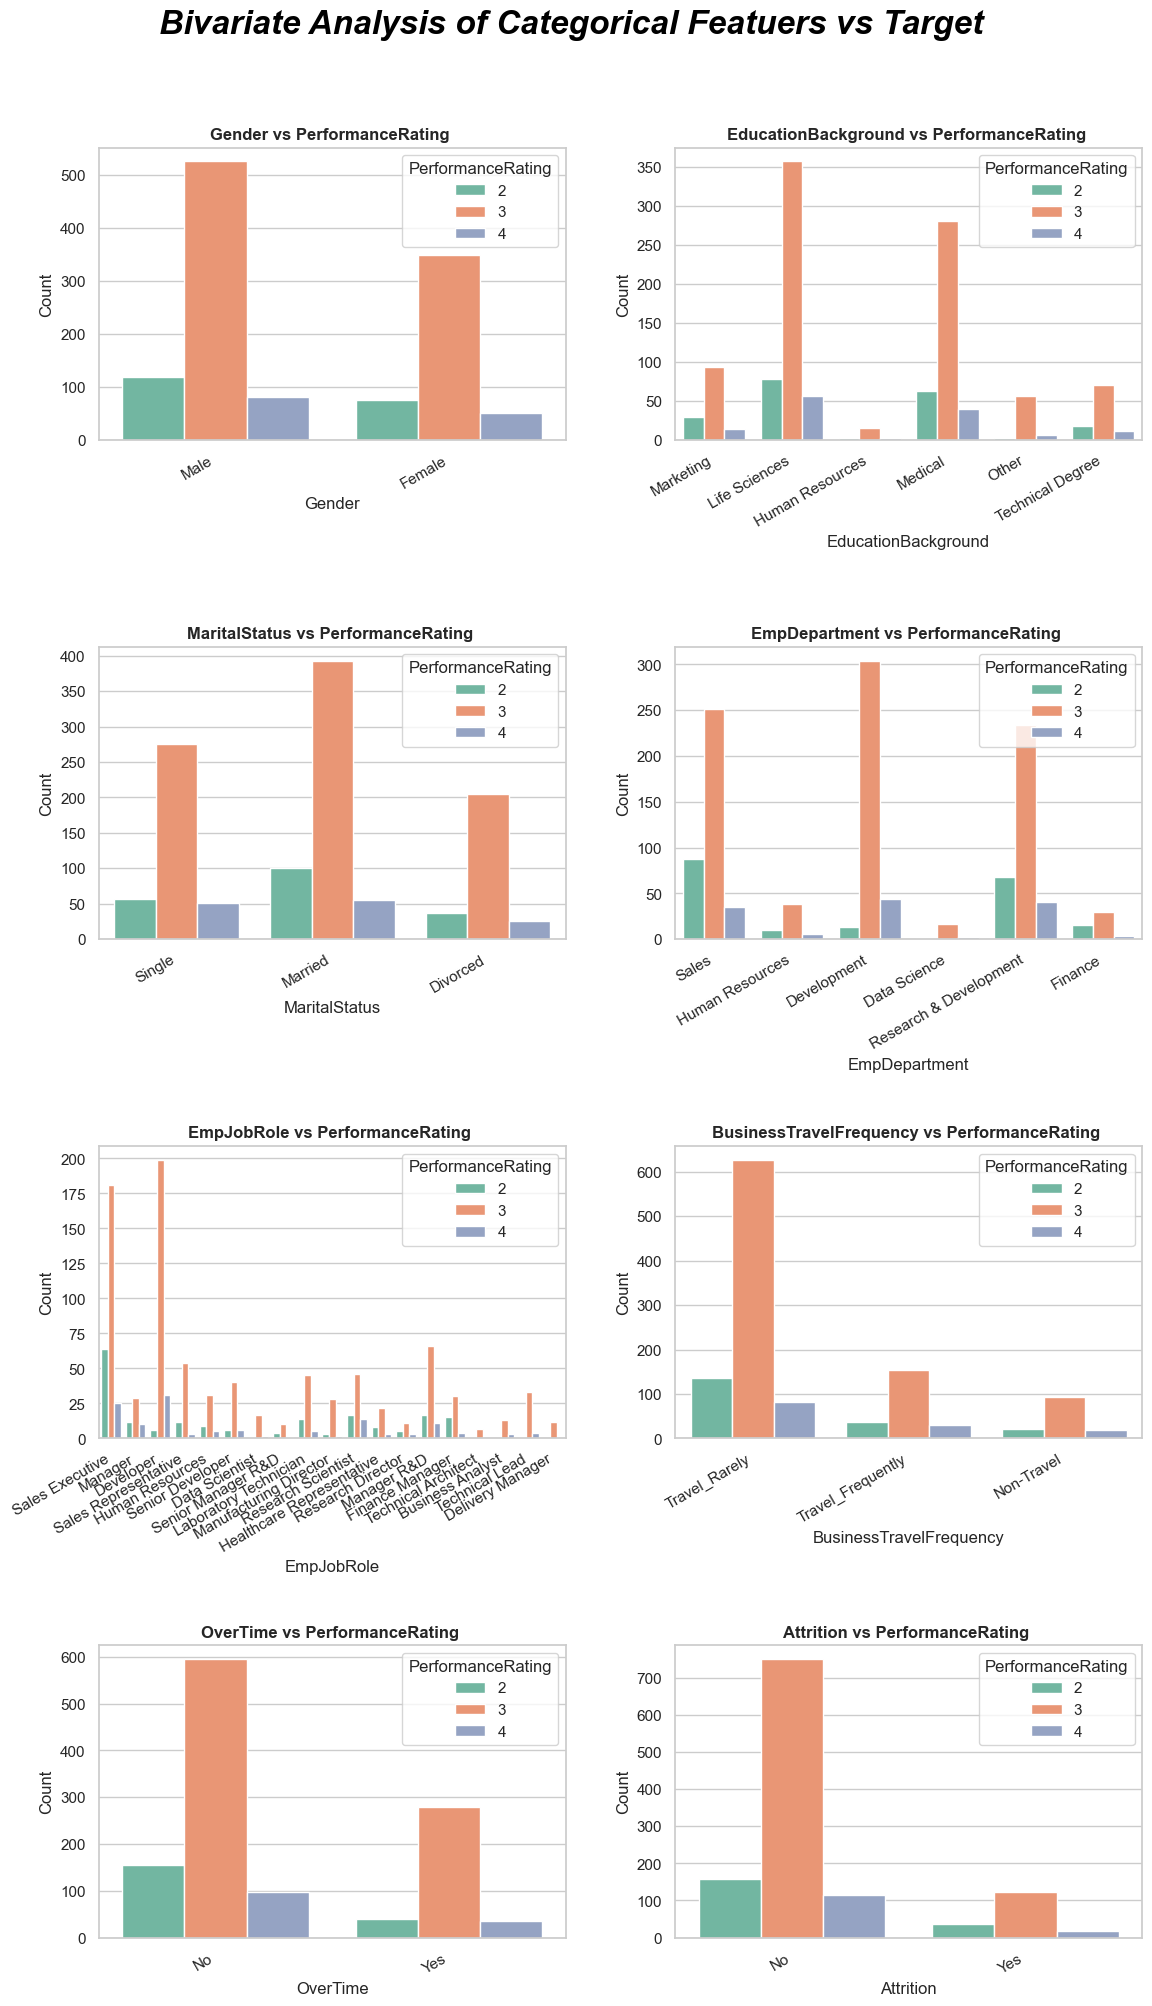

In [10]:
from src.visualization.bivarient_analysis import bivariate_categorical_plots
bivariate_categorical_plots(df)

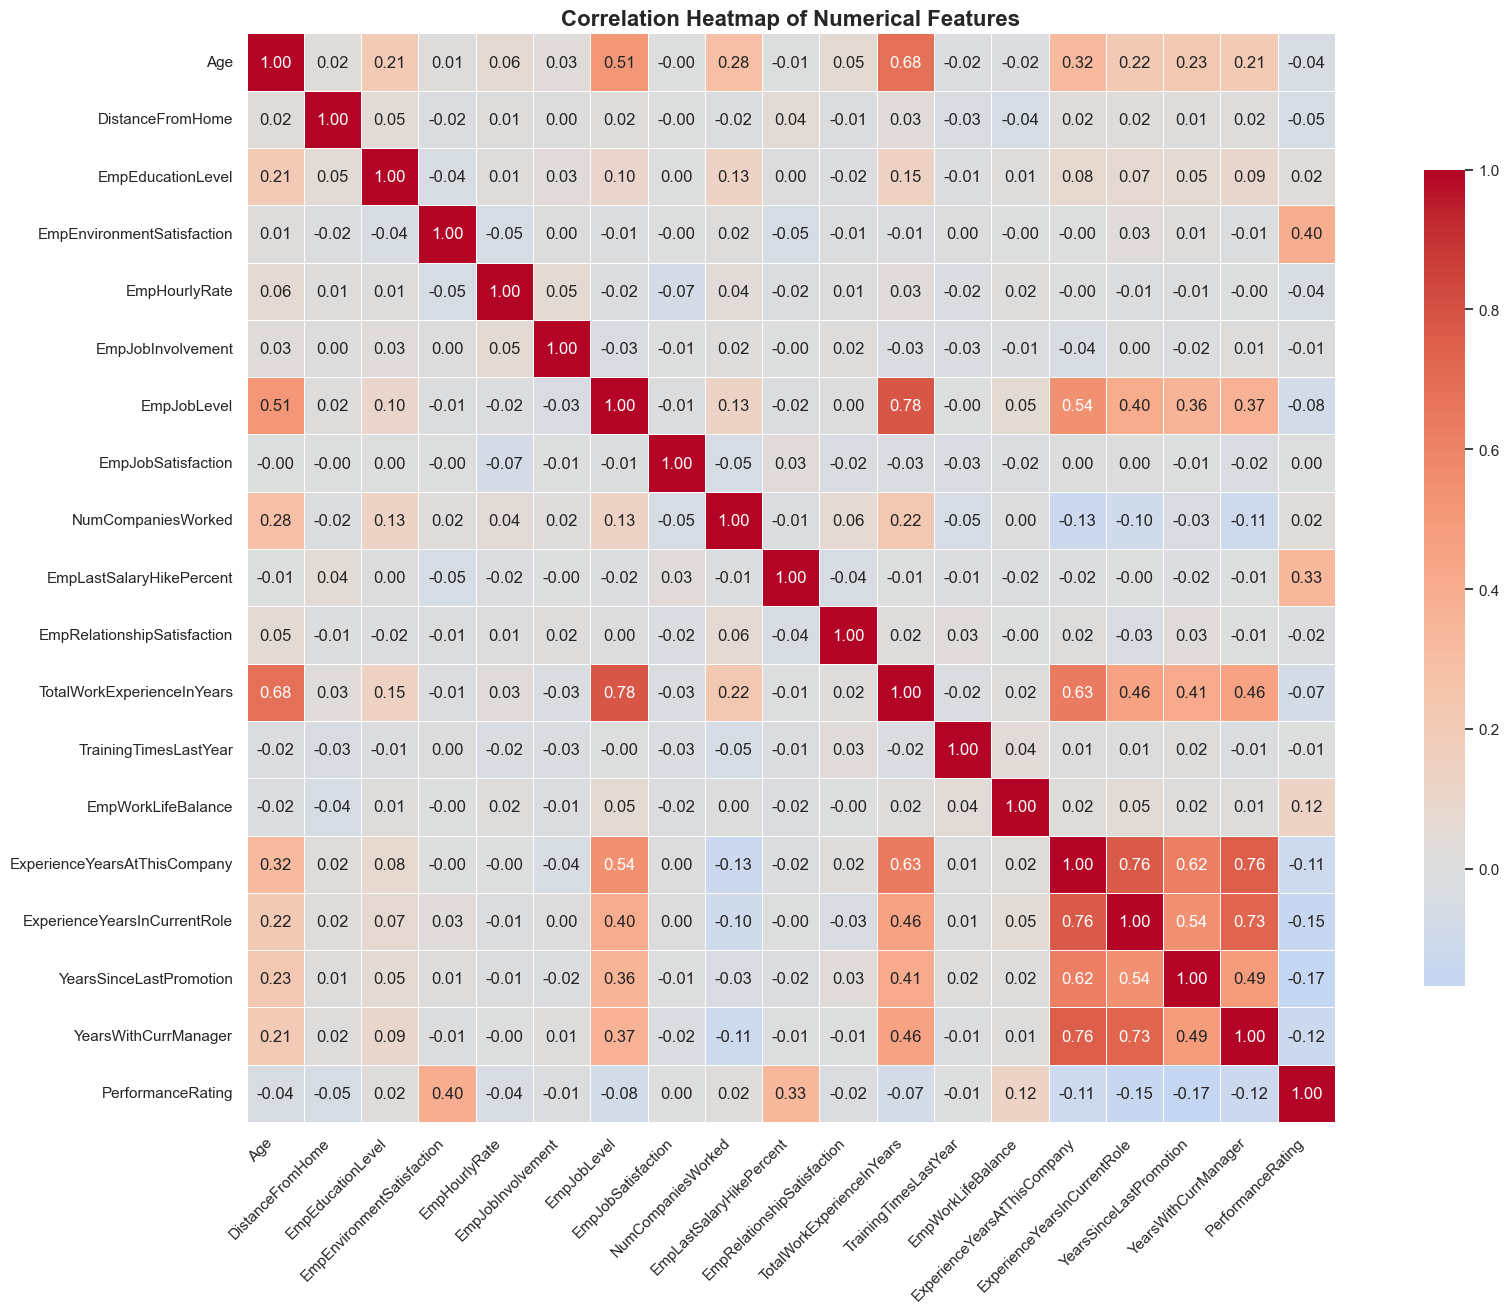

In [11]:
from src.visualization.eda import plot_correlation_heatmap
plot_correlation_heatmap(df)

### `Analysis of correlation results :`
- Salary hikes and performance: Employees who received higher salary hikes tend to have better performance ratings (correlation = 0.33), suggesting financial incentives may boost productivity.

- Work environment and performance: Satisfaction with the work environment shows a moderate positive correlation with performance (0.40), emphasizing the impact of a conducive workplace.

- Job satisfaction's impact: Job satisfaction shows almost no correlation with performance rating, indicating that satisfaction alone may not directly influence performance outcomes.

- Tenure and manager relationship: Time with the current manager strongly correlates with time at the company (0.76), reflecting stable manager-employee relationships over longer employment spans.

- Age and experience: Older employees generally have more total work experience (0.68), which likely contributes to their roles and progression within the company.


In [12]:
from src.visualization.eda import department_wise_performance,get_top_correlated_features

In [13]:
department_wise_performance(df)

EmpDepartment
Development               3.085873
Data Science              3.050000
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Finance                   2.775510
Name: PerformanceRating, dtype: float64

In [14]:
get_top_correlated_features(df)

EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
YearsSinceLastPromotion         0.167629
ExperienceYearsInCurrentRole    0.147638
EmpWorkLifeBalance              0.124429
Name: PerformanceRating, dtype: float64

In [15]:
from src.visualization.eda import get_highly_correlated_features
get_highly_correlated_features(df)

,Feature1,Feature2,Correlation
0,EmpJobLevel,TotalWorkExperienceInYears,0.784229
1,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,0.764102
2,ExperienceYearsAtThisCompany,YearsWithCurrManager,0.759258
3,ExperienceYearsInCurrentRole,YearsWithCurrManager,0.728973


In [16]:
from src.visualization.eda import detect_outliers_iqr,plot_boxplots
detect_outliers_iqr(df)

Outlier Summary (IQR Method):



,Column,Outlier Count,Outlier Percentage
0,Age,0,0.00
1,DistanceFromHome,0,0.00
2,EmpHourlyRate,0,0.00
3,EmpLastSalaryHikePercent,0,0.00
4,TotalWorkExperienceInYears,51,4.25
5,ExperienceYearsAtThisCompany,56,4.67
6,ExperienceYearsInCurrentRole,16,1.33
7,YearsSinceLastPromotion,88,7.33
8,YearsWithCurrManager,11,0.92


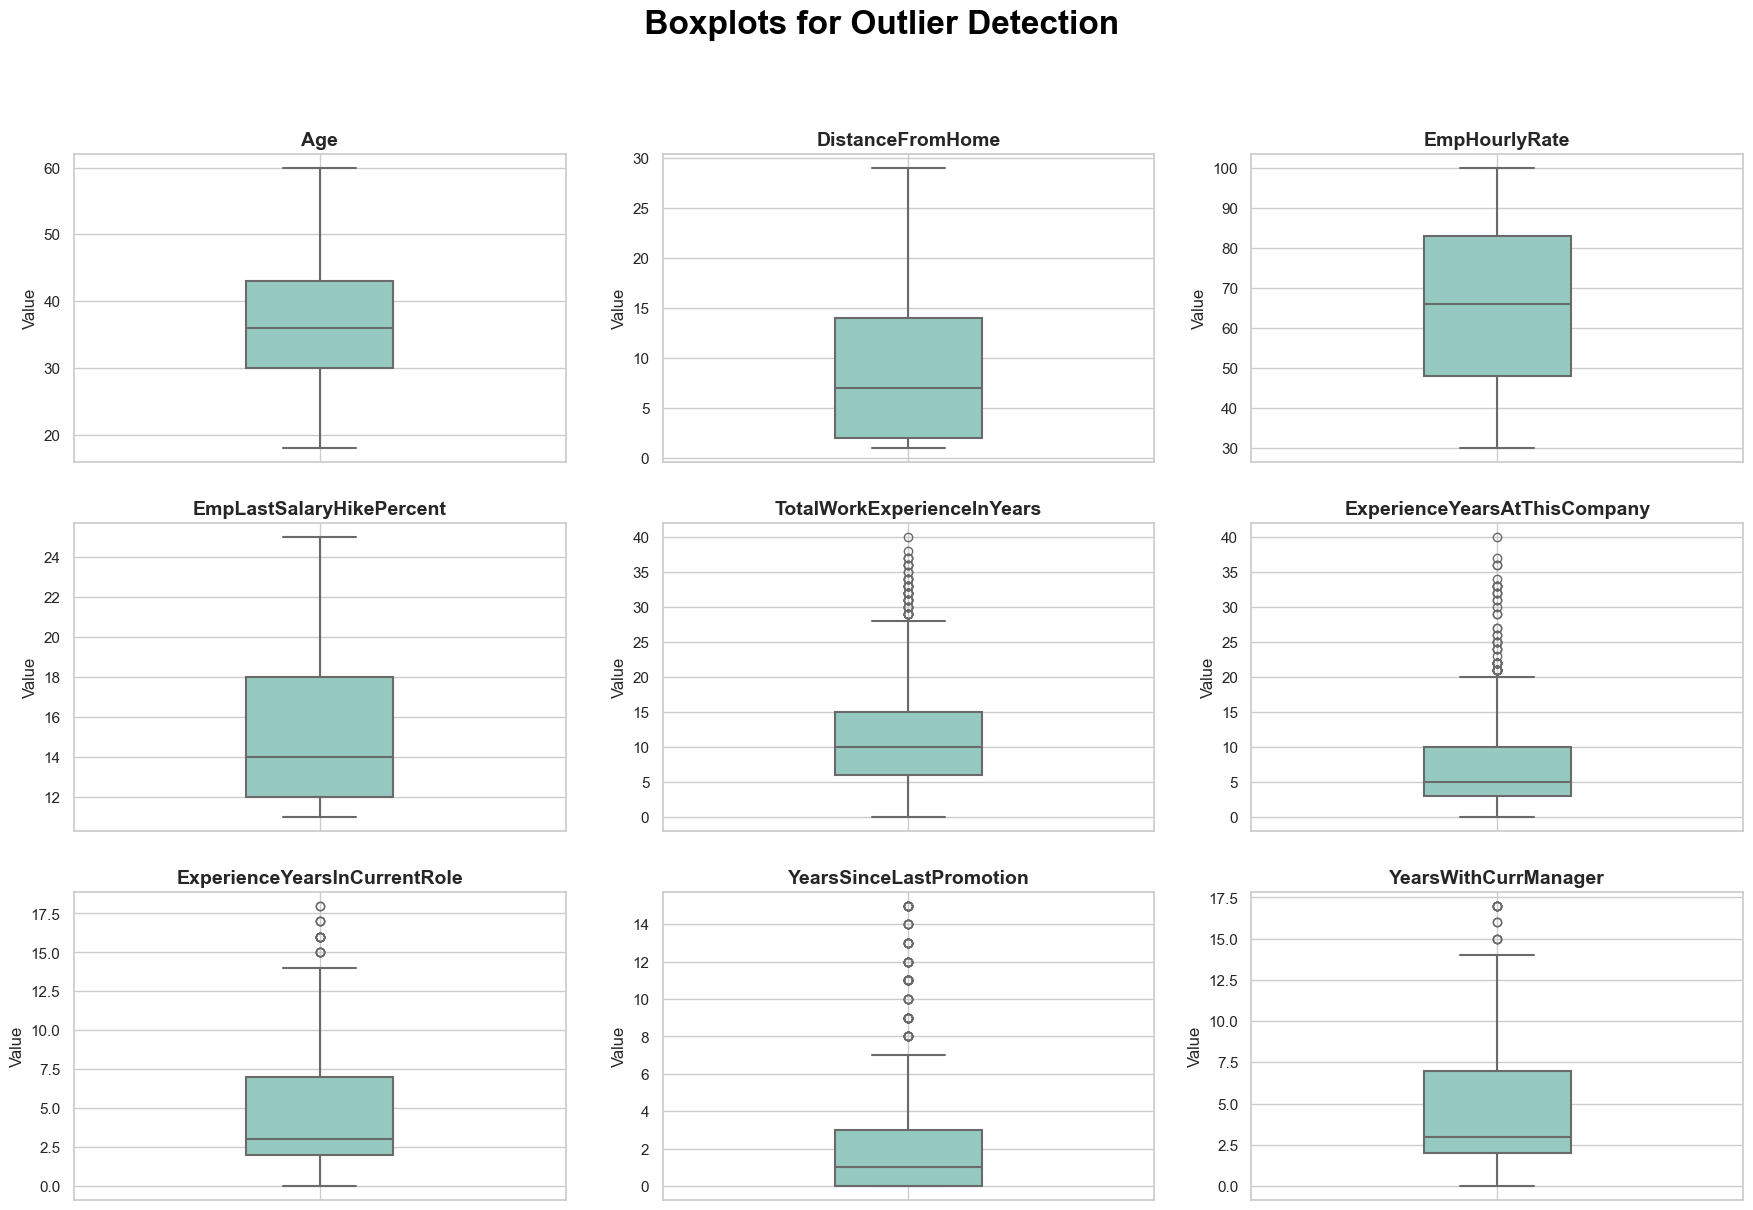

In [17]:
plot_boxplots(df)

***
***
# Outlier visualisation
- **`Outliers` are data points that significantly deviate from the other observations in a dataset.  They can be caused by errors in data collection, `measurement errors`, or simply represent naturally occurring `extreme values`. `Identifying and handling outliers is crucial in data analysis`, as they can skew statistical results and distort the interpretation of patterns.  Depending on the context and the nature of the data, outliers might be removed, transformed, or retained, requiring careful consideration of their potential impact.** 

# ***The subsequent notebook on Data Preprocessing will follow this notebook on Exploratory Data Analysis (EDA).***
***
# <center>**` To be continued....`**</center> 
***